- "DataOperations" adlı bir class oluşturmanız.

- Bu class'ta şunların olmasını bekliyoruz:
- - Eğer class oluşturulurken bir numpy array'i verilirse bunu pandas dataframe'ine çevirerek kaydetmesi,
- - Eğer bir path verilirse, ve bu path'de csv ya da json dosyası varsa bunu veriyi bir pandas dataframe'ine kaydetmesi,
- - Eğer direk olarak pandas dataframe'i verilirse de herhangi bir değişiklik yapmadan kaydetmesi,
- - Eğer herhangi bir değer verilmeden class oluşturulursa, rastgele bir veri seti oluşturmanız gerekmekte.

- Class oluşturulduktan sonra ise bu veri üzerine analiz çıkartabilecek fonksiyonlar yazmanızı bekliyoruz:
- - Her sütundaki veri sayısı ve tipi, eğer sayısal veriler varsa standart sapma, ortalama gibi istatistiksel değerlerini veren bir fonksiyon,
- - Sayısal veriler içeren sütunların görselleştirilmesi.

- Tüm fonksiyonlara ve ana class içeriğine Docstringlerini yazmaya, isimlendirmeleri Python kurallarına göre yapmaya dikkat etmeye çalışın lütfen.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataOperations:
    
    def __init__(self, data):
        
        """
        Initializes a DataOperations instance and assigns x as an instance variable
        to the created instance.
        """
        if type(data) is np.ndarray:
            self.data = pd.DataFrame(data)
        elif type(data) is pd.core.frame.DataFrame:
            self.data = data
        elif type(data) is dict:
            self.data = pd.DataFrame(data)
        elif type(data) is str and data.startswith('https'):
            if data.split('.')[-1] == 'csv':
                self.data = pd.read_csv(data)
            elif data.split('.')[-1] == 'json':
                self.data = pd.read_json(data)
            else:
                raise ValueError('Please enter a correct data path!')
        else:
            self.data = data
    
    def read(self):
        
        """
        Reads the instance variable assigned to the instance as a DataFrame.
        """
        return self.data
    
    def analyze(self, kind=None, x=None):
        
        """
        Returns the descriptive statistics, data types, and unique value counts for each column
        in the dataset.
        
        kind: count - returns the value counts of a selected column, x 
              info - returns the number of non-null values and type of each column in the dataset
              describe - returns the descriptive statistics for each column in the dataset
        If none of them is selected, the default is describe().
        """
        
        if kind == 'count':
            x = str(x)
            return self.data[x].value_counts(dropna=False)
        elif kind == 'info':
            return self.data.info()
        elif kind == 'describe':
            return self.data.describe()
        else:
            return self.data.describe()

    def visualize(self, x=None, y=None, kind=None):
        
        """
        Returns a visual representation of the numeric columns of the dataset.
        
        Kind: boxplot, lineplot, scatterplot, or pairplot. If none is selected, the default is sns.pairplot().
        """
        if kind == 'boxplot': 
            return sns.boxplot(x=x, y=None, data=self.data)
        elif kind == 'lineplot':
            return sns.lineplot(x=x, y=y, data=self.data)
        elif kind == 'scatterplot':
            return sns.scatterplot(x=x, y=y, data=self.data)
        elif kind == 'pairplot':
            return sns.pairplot(self.data.select_dtypes(include=np.number))
        else:
            return sns.pairplot(self.data.select_dtypes(include=np.number))        

### 1. If the parameter is of type numpy.ndarray

In [140]:
param = np.random.randint(10, size=(3,3))
param

array([[8, 0, 7],
       [9, 7, 6],
       [7, 1, 0]])

In [141]:
df = DataOperations(param)

In [142]:
df.read()

,0,1,2
0,8,0,7
1,9,7,6
2,7,1,0


In [143]:
df.analyze()

,0,1,2
count,3.0,3.000000,3.000000
mean,8.0,2.666667,4.333333
std,1.0,3.785939,3.785939
min,7.0,0.000000,0.000000
25%,7.5,0.500000,3.000000
50%,8.0,1.000000,6.000000
75%,8.5,4.000000,6.500000
max,9.0,7.000000,7.000000


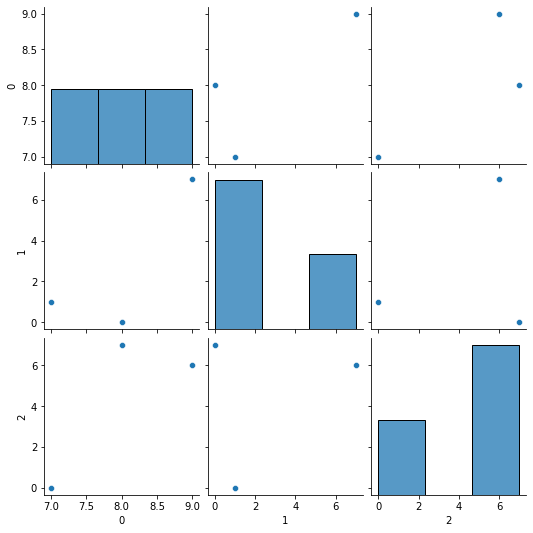

In [144]:
df.visualize()

<AxesSubplot:xlabel='0'>

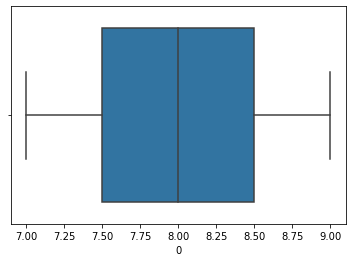

In [145]:
df.visualize(kind='boxplot', x=0)

### 2. If the parameter is of type dict

In [146]:
param = {'Company':['GOOGLE', 'GOOGLE', 'MICROSOFT', 'MICROSOFT', 'FACE', 'FACE'],
       'Person':['Mehmet', 'Dustin', 'Yavuzhan', 'Joe', 'Michael', 'Jason'],
       'Sales':[100, 140, 150, 99, 102, 110]}

In [147]:
df2 = DataOperations(param)

In [148]:
df2.read()

,Company,Person,Sales
0,GOOGLE,Mehmet,100
1,GOOGLE,Dustin,140
2,MICROSOFT,Yavuzhan,150
3,MICROSOFT,Joe,99
4,FACE,Michael,102
5,FACE,Jason,110


In [149]:
df2.analyze()

,Sales
count,6.000000
mean,116.833333
std,22.382285
min,99.000000
25%,100.500000
50%,106.000000
75%,132.500000
max,150.000000


In [150]:
df2.analyze(kind='count', x='Person')

Mehmet      1
Dustin      1
Yavuzhan    1
Joe         1
Michael     1
Jason       1
Name: Person, dtype: int64

In [151]:
df2.analyze(kind='info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  6 non-null      object
 1   Person   6 non-null      object
 2   Sales    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


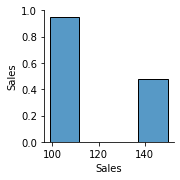

In [152]:
df2.visualize()

<AxesSubplot:xlabel='Sales'>

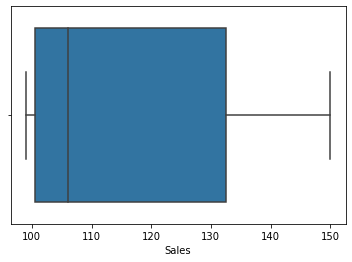

In [153]:
df2.visualize(kind='boxplot', x='Sales')

### 3. If the parameter is a path

In [154]:
param = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/iris.csv'

In [155]:
df3 = DataOperations(param)

In [156]:
df3.read()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [157]:
df3.analyze(kind='count', x='sepal_width')

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

In [158]:
df3.analyze(kind='info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [159]:
df3.analyze()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


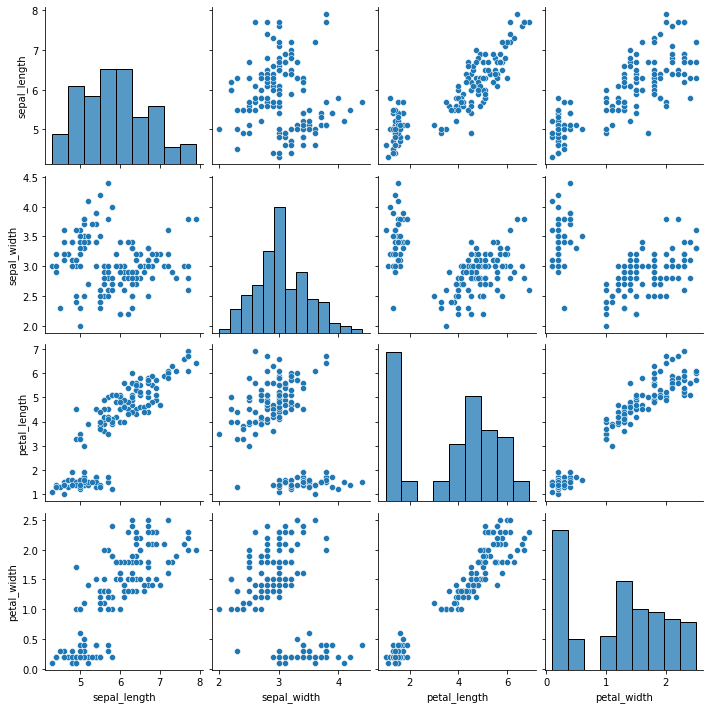

In [160]:
df3.visualize()

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

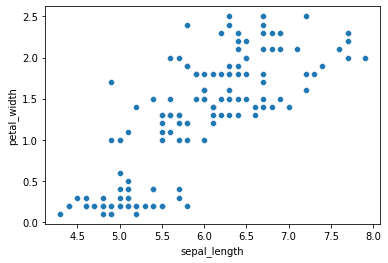

In [161]:
df3.visualize(kind='scatterplot', x='sepal_length', y='petal_width')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

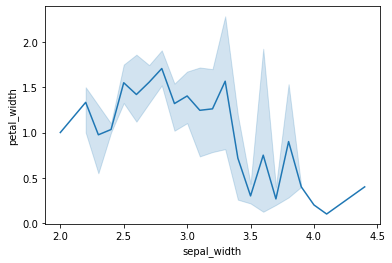

In [162]:
df3.visualize(kind='lineplot', x='sepal_width', y='petal_width')

<AxesSubplot:xlabel='sepal_width'>

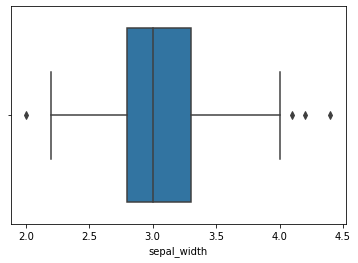

In [163]:
df3.visualize(kind='boxplot', x='sepal_width')